<a href="https://colab.research.google.com/github/natalja-s/encoded-inequality-thesis/blob/main/Gendered_Adjective_Analysis_Frequency_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install textblob
from textblob import TextBlob
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Load Files

female_path = 'data/female_adjectives.xlsx'
male_path = 'data/male_adjectives.xlsx'

# Load Excel files
df_female = pd.read_excel(female_path)
df_male = pd.read_excel(male_path)

# Normalize and clean
df_female.columns = ['adjective', 'female_count']
df_male.columns = ['adjective', 'male_count']
df_female['adjective'] = df_female['adjective'].str.lower().str.strip()
df_male['adjective'] = df_male['adjective'].str.lower().str.strip()

In [ ]:
# Method 1-3: Frequency Comparisons & Gender Exclusivity

# Merge both tables for comparison
df = pd.merge(df_female, df_male, on='adjective', how='outer').fillna(0)
df['female_count'] = df['female_count'].astype(int)
df['male_count'] = df['male_count'].astype(int)

# Total and log-ratio
df['total'] = df['female_count'] + df['male_count']
df['log_ratio'] = (df['male_count'] + 1).div(df['female_count'] + 1).apply(np.log)

# Exclusivity
df['exclusively_female'] = df['male_count'] == 0
df['exclusively_male'] = df['female_count'] == 0

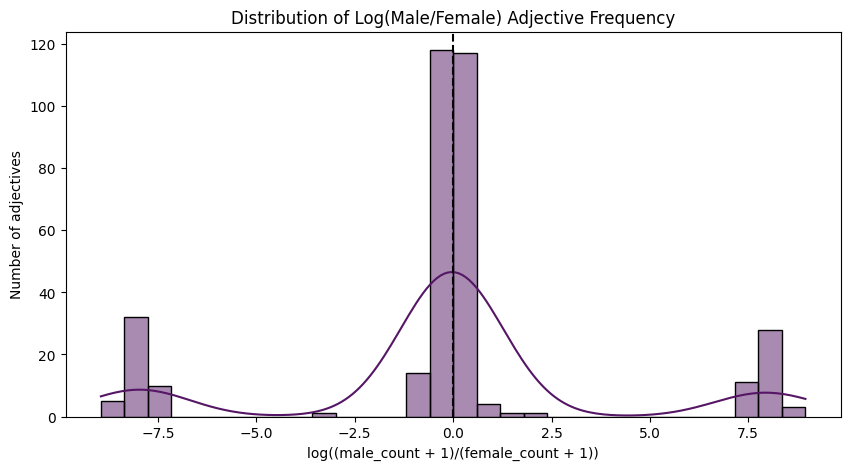

In [ ]:
# Method 1: Frequency Comparison (Log Ratio Distribution)

plt.figure(figsize=(10, 5))
sns.histplot(df['log_ratio'], bins=30, kde=True, color='#551665')
plt.title('Distribution of Log(Male/Female) Adjective Frequency')
plt.xlabel('log((male_count + 1)/(female_count + 1))')
plt.ylabel('Number of adjectives')
plt.axvline(0, color='black', linestyle='--')
plt.show()

In [ ]:
log_threshold = 2.5

# Strongly male-biased
strong_male = df[df['log_ratio'] >= log_threshold][['adjective', 'log_ratio']]
print("Strongly male-biased adjectives:")
print(strong_male.sort_values(by='log_ratio', ascending=False).head(15))

# Strongly female-biased
strong_female = df[df['log_ratio'] <= -log_threshold][['adjective', 'log_ratio']]
print("\nStrongly female-biased adjectives:")
print(strong_female.sort_values(by='log_ratio').head(15))


Strongly male-biased adjectives:
          adjective  log_ratio
22          average   8.951051
56         complete   8.912204
78        defensive   8.811354
18         athletic   8.307706
218       offensive   8.281724
84       diplomatic   8.157944
157        imperial   8.143517
210           naval   8.138565
14            armed   8.058327
159      impressive   8.054840
172         interim   8.025189
44         civilian   8.008033
271  representative   8.002360
195      managerial   7.999007
63   constitutional   7.992269

Strongly female-biased adjectives:
         adjective  log_ratio
123       feminist  -8.948976
33           brief  -8.750525
73           daily  -8.559486
245       pregnant  -8.438150
240   postdoctoral  -8.369157
183        lesbian  -8.317522
103      emotional  -8.223091
223       opposite  -8.203578
49        clinical  -8.155936
87         diverse  -8.148735
222       operatic  -8.101072
136       graduate  -8.085179
314        teenage  -8.079928
31           bl

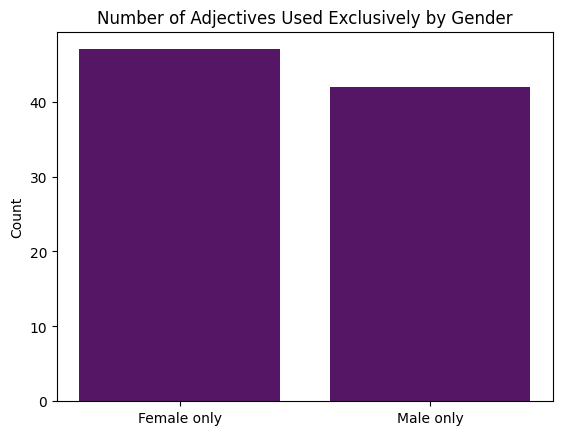

In [ ]:
# Method 2: Gender Exclusivity (Bar Chart)

exclusive_counts = [
    df['exclusively_female'].sum(),
    df['exclusively_male'].sum()
]

plt.bar(['Female only', 'Male only'], exclusive_counts, color='#551665')
plt.title('Number of Adjectives Used Exclusively by Gender')
plt.ylabel('Count')
plt.show()


In [ ]:
# Adjectives used exclusively in male biographies
exclusive_male = df[(df['male_count'] > 0) & (df['female_count'] == 0)][['adjective', 'male_count']]
print(f"\nTotal male-exclusive adjectives: {exclusive_male.shape[0]}")
print("All male-exclusive adjectives:")
print(exclusive_male.sort_values(by='male_count', ascending=False))

# Adjectives used exclusively in female biographies
exclusive_female = df[(df['female_count'] > 0) & (df['male_count'] == 0)][['adjective', 'female_count']]
print(f"\nTotal female-exclusive adjectives: {exclusive_female.shape[0]}")
print("All female-exclusive adjectives:")
print(exclusive_female.sort_values(by='female_count', ascending=False))



Total male-exclusive adjectives: 42
All male-exclusive adjectives:
          adjective  male_count
22          average        7715
56         complete        7421
78        defensive        6709
18         athletic        4054
218       offensive        3950
84       diplomatic        3490
157        imperial        3440
210           naval        3423
14            armed        3159
159      impressive        3148
172         interim        3056
44         civilian        3004
271  representative        2987
195      managerial        2977
63   constitutional        2957
197         martial        2910
302        standard        2789
292            slow        2754
207          mutual        2703
274   revolutionary        2640
258          proper        2625
198         massive        2583
13         apparent        2548
333          vacant        2490
113   extraordinary        2478
181       legendary        2469
317     theoretical        2468
98       electrical        2431
37  

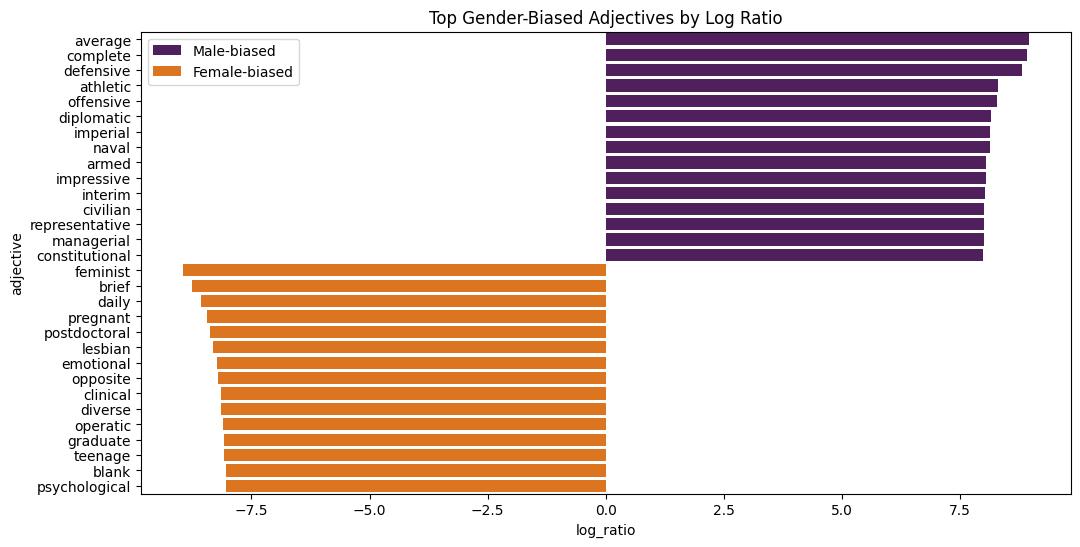

In [ ]:
#Method 3: Most Biased Adjectives (Top 15 by Log-Ratio)

top_male = df.sort_values('log_ratio', ascending=False).head(15)
top_female = df.sort_values('log_ratio').head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='log_ratio', y='adjective', data=top_male, color='#551665', label='Male-biased')
sns.barplot(x='log_ratio', y='adjective', data=top_female, color='#fb7200', label='Female-biased')
plt.title("Top Gender-Biased Adjectives by Log Ratio")
plt.legend()
plt.show()


In [ ]:
# Method 4: Sentiment Analysis

!pip install textblob
from textblob import TextBlob

df['sentiment'] = df['adjective'].apply(lambda x: TextBlob(x).sentiment.polarity)

<ipython-input-11-d64724d4cb38>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bias_direction', y='sentiment', data=df, palette={'male': '#551665', 'female': '#fb7200'})


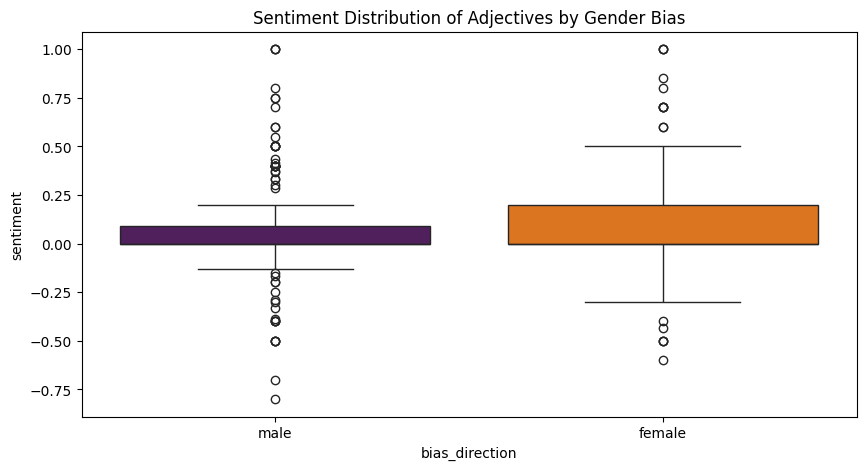

In [ ]:
# Sentiment Distribution by Gender

df['bias_direction'] = df['log_ratio'].apply(lambda x: 'male' if x > 0 else 'female')

plt.figure(figsize=(10, 5))
sns.boxplot(x='bias_direction', y='sentiment', data=df, palette={'male': '#551665', 'female': '#fb7200'})
plt.title('Sentiment Distribution of Adjectives by Gender Bias')
plt.show()


In [ ]:
# Most positive/negative sentiments by gender group

# Merge for comparison
df = pd.merge(df_female, df_male, on='adjective', how='outer').fillna(0)
df['female_count'] = df['female_count'].astype(int)
df['male_count'] = df['male_count'].astype(int)

# Total and log-ratio (re-calculate as the merge overwrites)
df['total'] = df['female_count'] + df['male_count']
df['log_ratio'] = (df['male_count'] + 1).div(df['female_count'] + 1).apply(np.log)

# Exclusivity (re-calculate as the merge overwrites)
df['exclusively_female'] = df['male_count'] == 0
df['exclusively_male'] = df['female_count'] == 0

# Calculate sentiment *after* merging and re-calculating relevant columns
!pip install textblob
from textblob import TextBlob

df['sentiment'] = df['adjective'].apply(lambda x: TextBlob(x).sentiment.polarity)


# Split by gender association (positive log_ratio = male; negative = female)
df['gender_bias'] = df['log_ratio'].apply(lambda x: 'male' if x > 0 else 'female')

# Most positive and most negative by sentiment
# Correct the column name from 'sentiment_score' to 'sentiment'
most_positive = df.sort_values(by='sentiment', ascending=False).groupby('gender_bias').head(10)
most_negative = df.sort_values(by='sentiment').groupby('gender_bias').head(10)

print("\nMost positive sentiment adjectives by gender group:")
print(most_positive[['adjective', 'sentiment', 'gender_bias']]) # Also update print statement

print("\nMost negative sentiment adjectives by gender group:")
print(most_negative[['adjective', 'sentiment', 'gender_bias']]) # Also update print statement


Most positive sentiment adjectives by gender group:
         adjective  sentiment gender_bias
232        perfect       1.00      female
106      excellent       1.00        male
341      wonderful       1.00      female
159     impressive       1.00        male
27            best       1.00      female
181      legendary       1.00        male
26       beautiful       0.85      female
142          happy       0.80      female
139          great       0.80        male
308     successful       0.75        male
269     remarkable       0.75        male
34          bright       0.70      female
114           fair       0.70      female
309       superior       0.70        male
311       talented       0.70      female
135           good       0.70      female
40      charitable       0.60      female
95       effective       0.60        male
213          noble       0.60        male
65   controversial       0.55        male

Most negative sentiment adjectives by gender group:
     adjecti

In [ ]:
# Word Cloud
# Merge for comparison
df = pd.merge(df_female, df_male, on='adjective', how='outer').fillna(0)
df['female_count'] = df['female_count'].astype(int)
df['male_count'] = df['male_count'].astype(int)

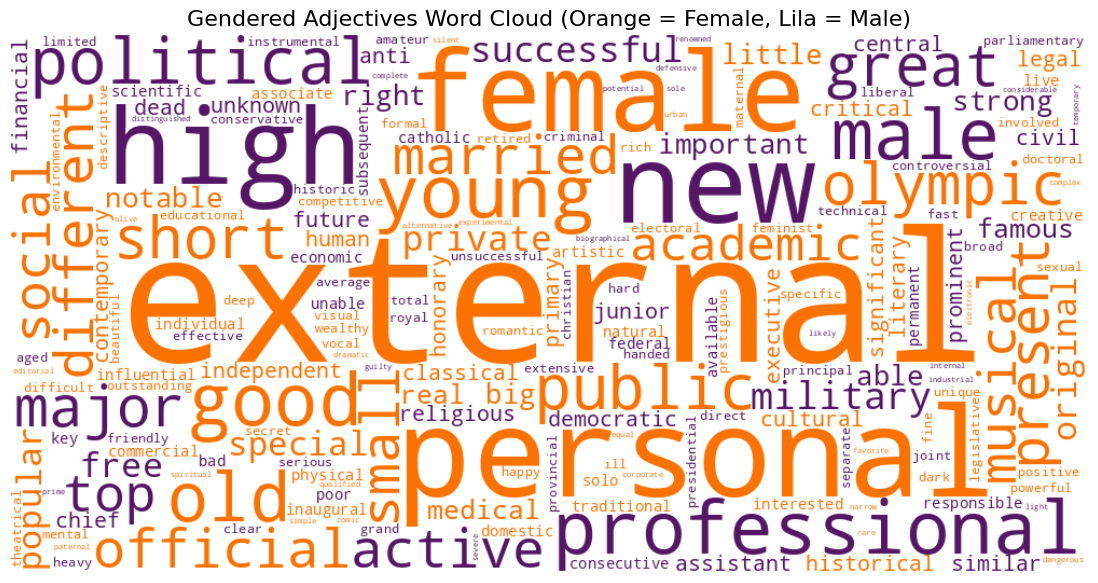

In [ ]:
# Create combined frequency dictionary with gender-color tags

# Tag each word with the dominant gender and use that color
def color_func(word, font_size, position, orientation, font_path, random_state):
    gender = word_gender_map.get(word, 'neutral')
    if gender == 'female':
        return '#fb7200'  # Orange
    elif gender == 'male':
        return '#551665'  # Lilac
    else:
        return 'gray'  # Optional fallback for neutral/unclassified

# Build word frequency and gender map
word_freq = {}
word_gender_map = {}

for _, row in df.iterrows():
    total_freq = row['female_count'] + row['male_count']
    if total_freq == 0:
        continue
    word_freq[row['adjective']] = total_freq
    word_gender_map[row['adjective']] = (
        'female' if row['female_count'] > row['male_count'] else 'male'
    )

# Generate WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_freq)

# Recolor by gender
wordcloud = wordcloud.recolor(color_func=color_func)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Gendered Adjectives Word Cloud (Orange = Female, Lila = Male)", fontsize=16)
plt.show()


In [ ]:
# Select Top 50 for Each Gender
top_female = df_female.sort_values(by='female_count', ascending=False).head(50)
top_male = df_male.sort_values(by='male_count', ascending=False).head(50)

female_freq = dict(zip(top_female['adjective'], top_female['female_count']))
male_freq = dict(zip(top_male['adjective'], top_male['male_count']))


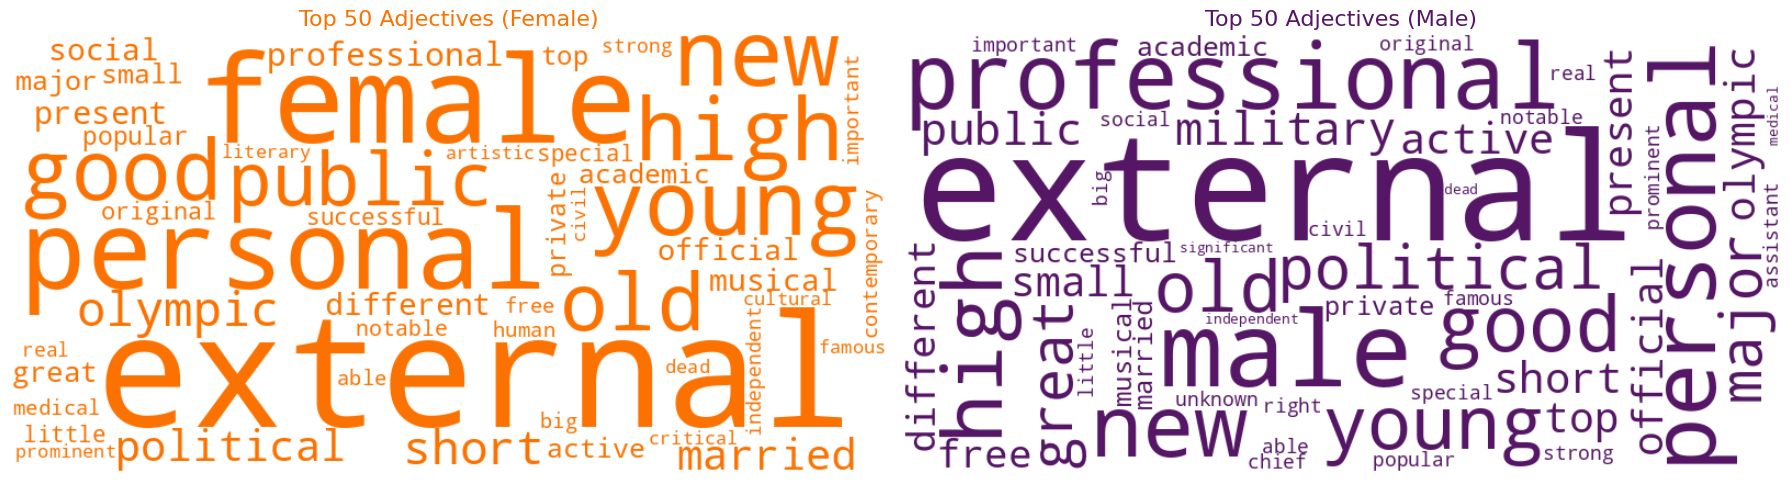

In [ ]:
# Generate Word Clouds

# Recolor by gender
# orange (female)
def orange_color_func(word, font_size, position, orientation, font_path, random_state):
    return '#fb7200'

# lilac (male)
def purple_color_func(word, font_size, position, orientation, font_path, random_state):
    return '#551665'

# Female Word Cloud
wc_female = WordCloud(width=800, height=400, background_color='white')
wc_female.generate_from_frequencies(female_freq)
wc_female = wc_female.recolor(color_func=orange_color_func)

# Male Word Cloud
wc_male = WordCloud(width=800, height=400, background_color='white')
wc_male.generate_from_frequencies(male_freq)
wc_male = wc_male.recolor(color_func=purple_color_func)

# Plot side-by-side
plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_female, interpolation='bilinear')
plt.title("Top 50 Adjectives (Female)", fontsize=16, color='#fb7200')  # Orange Titel
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_male, interpolation='bilinear')
plt.title("Top 50 Adjectives (Male)", fontsize=16, color='#551665')  # Lilac Titel
plt.axis('off')

plt.tight_layout()
plt.show()
